In [1]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix
import pandas as pd 
import streamlit as st
#from tensorflow import keras
from PIL import Image
#from keras import pad_sequences
import keras
from keras.utils import pad_sequences


In [2]:
## load the data
df = pd.read_csv("emails.csv")
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [3]:
df['Prediction'].value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [5]:
df = df.drop(columns=['Email No.'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 118.4 MB


In [7]:
## split the data into independent and dependent variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values



In [8]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 32)


In [9]:
## TRAIN THE LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)


c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
##  make the prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [11]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, pred_LR)

print(accuracy_LR)
print(conf_mat)


0.9623188405797102
[[698  18]
 [ 21 298]]


In [12]:
## naives bayes
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)


GaussianNB()

In [13]:
## predict the test set
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_NB})


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [14]:
## Evaluate the naive bayes model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)


print(accuracy_NB)
print(conf_mat_NB)

0.9458937198067633
[[676  40]
 [ 16 303]]


In [15]:
## K-Nearest Neighbors
Knn_model = KNeighborsClassifier(n_neighbors=5)
##train my model
Knn_model.fit(X_train, y_train)



KNeighborsClassifier()

In [16]:
## Make prediction
y_pred_knn = Knn_model.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [17]:
## Evaluate the naive bayes model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)


print(accuracy_knn)
print(conf_mat_knn)

0.8734299516908213
[[631  85]
 [ 46 273]]


In [18]:
## Decision tree classifier
Decision_tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5) 
Decision_tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5) 
Decision_tree_max_depth = DecisionTreeClassifier(max_depth=5)



In [19]:
## trainiong my models
Decision_tree_gini.fit(X_train,y_train)
Decision_tree_entropy.fit(X_train,y_train)
Decision_tree_max_depth.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=5)

In [20]:
## make prediction
y_pred_gini = Decision_tree_gini.predict(X_test)
y_pred_entropy = Decision_tree_entropy.predict(X_test)
y_pred_depth3 = Decision_tree_max_depth.predict(X_test)

In [21]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gini})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [22]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_entropy})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,1
1032,1,1
1033,0,0


In [23]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_depth3})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [24]:
## model evaluation
## Evaluate the gini
accuracy_gini = accuracy_score(y_test, y_pred_gini)
conf_mat_gini = confusion_matrix(y_test, y_pred_gini)




print(accuracy_gini)
print(conf_mat_gini)

0.8347826086956521
[[690  26]
 [145 174]]


In [25]:
## Evaluate the entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
conf_mat_entropy = confusion_matrix(y_test, y_pred_entropy)


print(accuracy_entropy)
print(conf_mat_entropy)

0.7855072463768116
[[497 219]
 [  3 316]]


In [26]:
## Evaluate the max_depth
accuracy_max_depth = accuracy_score(y_test, y_pred_depth3)
conf_mat_max_depth = confusion_matrix(y_test, y_pred_depth3)


print(accuracy_max_depth)
print(conf_mat_max_depth)

0.8405797101449275
[[700  16]
 [149 170]]


In [27]:
## SVM
#Create a SVM Classifier
clfLinear = svm.SVC(kernel='linear')
clfsigmoid = svm.SVC(kernel='sigmoid') 
clfrbf = svm.SVC(kernel='rbf') 

In [28]:

#Train the model using the training sets
clfLinear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)
clfrbf.fit(X_train, y_train)

SVC()

In [29]:
#Predict the response for test dataset
y_pred_linear = clfLinear.predict(X_test)
y_pred_sigmoid = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)


In [30]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [31]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_sigmoid})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,1
4,1,1
...,...,...
1030,1,0
1031,0,1
1032,1,0
1033,0,1


In [32]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rbf})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,0
1031,0,0
1032,1,0
1033,0,0


In [33]:
#Calculate the accuracy of our model
print("Linear Kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_linear))
print("Sigmoid kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_sigmoid))
print("rbf kernelAccuracy:",metrics.accuracy_score(y_test, y_pred_rbf))

Linear Kernel Accuracy: 0.9449275362318841
Sigmoid kernel Accuracy: 0.6231884057971014
rbf kernelAccuracy: 0.7961352657004831


In [34]:
## confussion matrix for the kernels
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)
conf_mat_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)

print(conf_mat_linear)
print(conf_mat_sigmoid)
print(conf_mat_rbf)

[[693  23]
 [ 34 285]]
[[541 175]
 [215 104]]
[[696  20]
 [191 128]]


<AxesSubplot: >

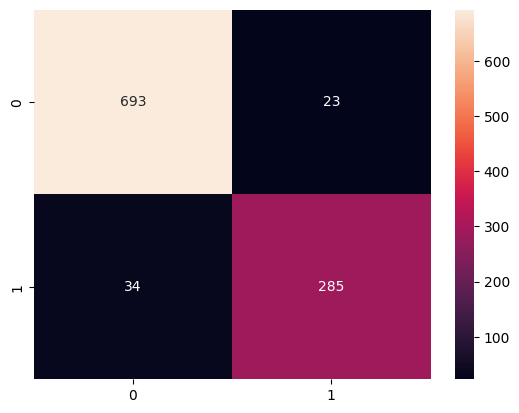

In [35]:
sns.heatmap(conf_mat_linear, annot=True, fmt='.0f')

In [36]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       716
           1       0.93      0.89      0.91       319

    accuracy                           0.94      1035
   macro avg       0.94      0.93      0.93      1035
weighted avg       0.94      0.94      0.94      1035



In [37]:
auc = roc_auc_score(y_test, y_pred_linear)
print('AUC: %f' %auc)

AUC: 0.930647


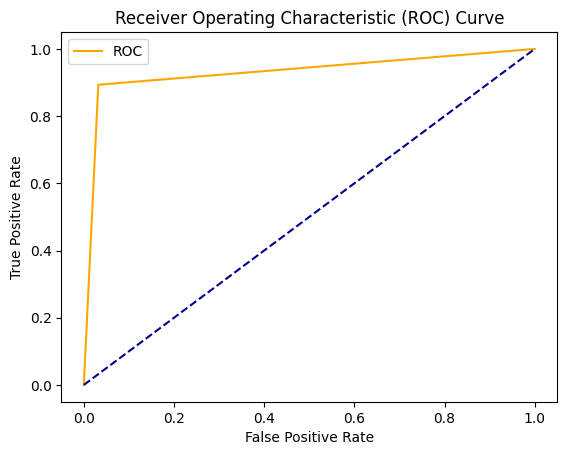

In [38]:
fpr, tpr = roc_curve(y_test, y_pred_linear)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [39]:
## Neural Network
## initialise the NN
model = Sequential()

##set up the layers
## input layer
model.add(Dense(units= 15, kernel_initializer= 'uniform', activation = 'relu', input_dim = 3000))
## hidden layer
model.add(Dense(units= 5, kernel_initializer= 'uniform', activation = 'relu'))
##regularization
model.add(Dropout(0.2))
##output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

## compiling the ANN

model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])





In [40]:
## train the model
history = model.fit(X_train, y_train, batch_size = 10, epochs = 100, validation_split= 0.30)

Epoch 1/100
290/290 [==============================] - 3s 4ms/step - loss: 0.5457 - accuracy: 0.7914 - val_loss: 0.3376 - val_accuracy: 0.9058
Epoch 2/100
290/290 [==============================] - 1s 3ms/step - loss: 0.3079 - accuracy: 0.9157 - val_loss: 0.1766 - val_accuracy: 0.9461
Epoch 3/100
290/290 [==============================] - 1s 3ms/step - loss: 0.2093 - accuracy: 0.9482 - val_loss: 0.1655 - val_accuracy: 0.9654
Epoch 4/100
290/290 [==============================] - 1s 4ms/step - loss: 0.1826 - accuracy: 0.9599 - val_loss: 0.1252 - val_accuracy: 0.9775
Epoch 5/100
290/290 [==============================] - 1s 4ms/step - loss: 0.1591 - accuracy: 0.9731 - val_loss: 0.1179 - val_accuracy: 0.9791
Epoch 6/100
290/290 [==============================] - 1s 4ms/step - loss: 0.1360 - accuracy: 0.9772 - val_loss: 0.1097 - val_accuracy: 0.9799
Epoch 7/100
290/290 [==============================] - 1s 4ms/step - loss: 0.1141 - accuracy: 0.9751 - val_loss: 0.1148 - val_accuracy: 0.9791

In [41]:
## make prediction
y_pred_ann = model.predict(X_test)
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)

33/33 [==============================] - 0s 2ms/step


In [42]:
print(y_test.shape)
print(y_pred_ann.shape)

(1035,)
(1035, 1)


In [43]:
y_pred_ann = y_pred_ann.flatten()

In [44]:
print(y_test.shape)
print(y_pred_ann.shape)

(1035,)
(1035,)


In [45]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ann})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [46]:
##classification report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       716
           1       0.96      0.96      0.96       319

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



In [47]:
cm = confusion_matrix(y_test, y_pred_ann)
cm

array([[703,  13],
       [ 12, 307]], dtype=int64)

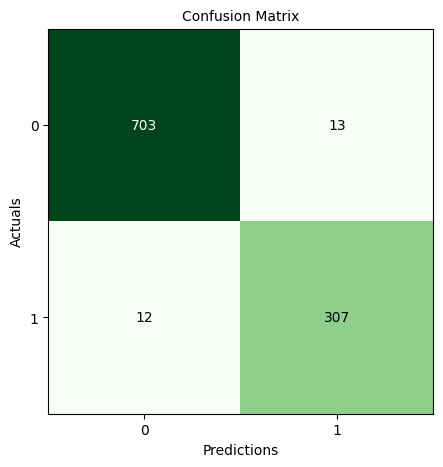

In [48]:
## plot a confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5, 5), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [49]:
auc = roc_auc_score(y_test, y_pred_ann)
print('AUC: %f' %auc)

AUC: 0.972113


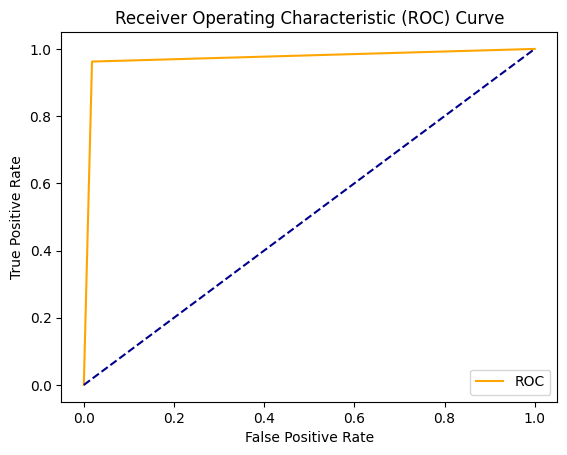

In [50]:
fpr, tpr = roc_curve(y_test, y_pred_ann)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [51]:
#save the model (model.save it's only model because we cal var 'model)


#model.save('ann_model')

In [52]:
#save the logistic regression model

#import pickle 
#save model to the file (in brackets its name you give to your model_LR always use .pk1)
#with open ('logistic_regression_model.pk1', 'wb') as file:
    #pickle.dump(model_LR, file) #(this is name of model you saved in code before)

IndentationError: unexpected indent (1946104518.py, line 6)

In [53]:
word_index={word:  index for index , word in enumerate(df.columns[:-1])}


In [54]:
word_index

{'the': 0,
 'to': 1,
 'ect': 2,
 'and': 3,
 'for': 4,
 'of': 5,
 'a': 6,
 'you': 7,
 'hou': 8,
 'in': 9,
 'on': 10,
 'is': 11,
 'this': 12,
 'enron': 13,
 'i': 14,
 'be': 15,
 'that': 16,
 'will': 17,
 'have': 18,
 'with': 19,
 'your': 20,
 'at': 21,
 'we': 22,
 's': 23,
 'are': 24,
 'it': 25,
 'by': 26,
 'com': 27,
 'as': 28,
 'from': 29,
 'gas': 30,
 'or': 31,
 'not': 32,
 'me': 33,
 'deal': 34,
 'if': 35,
 'meter': 36,
 'hpl': 37,
 'please': 38,
 're': 39,
 'e': 40,
 'any': 41,
 'our': 42,
 'corp': 43,
 'can': 44,
 'd': 45,
 'all': 46,
 'has': 47,
 'was': 48,
 'know': 49,
 'need': 50,
 'an': 51,
 'forwarded': 52,
 'new': 53,
 't': 54,
 'may': 55,
 'up': 56,
 'j': 57,
 'mmbtu': 58,
 'should': 59,
 'do': 60,
 'am': 61,
 'get': 62,
 'out': 63,
 'see': 64,
 'no': 65,
 'there': 66,
 'price': 67,
 'daren': 68,
 'but': 69,
 'been': 70,
 'company': 71,
 'l': 72,
 'these': 73,
 'let': 74,
 'so': 75,
 'would': 76,
 'm': 77,
 'into': 78,
 'xls': 79,
 'farmer': 80,
 'attached': 81,
 'us': 82,
 